# Linear Regression

In [20]:
# import libraries
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [21]:
test = pd.read_csv("bigmart_test.csv")
train = pd.read_csv("bigmart_train.csv")

In [22]:
# number of rows and columns in the data sets 
train.shape

(8523, 12)

In [23]:
# column names of train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
# number of rows and columns in the test data sets 
test.shape

(5681, 11)

In [25]:
# column names of test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [26]:
# combine test and train dataset into one file to perform EDA
train ["source"] = "train"
test ["source"]="test"
data = pd.concat([train, test], ignore_index=True)
print(data.shape)

(14204, 13)


In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [28]:
# describe function for the numerial data summary 
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
# Checking missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [30]:
# print the unique value in the item_fat_column, where  there is only two unique types of content such as low or regular
unique_values = data["Item_Fat_Content"].unique()
print(unique_values)


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [31]:
# print the unique value in the OUTLET COLUMN 
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [32]:
# calculate the outlet age
data["Outlet_Age"] = 2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [33]:
# Unique values in Outlet_size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [34]:
# print the count value of item_fat_content
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

--we can see the low fat products are abundant

In [35]:
# print the count value of Outlet_Size
data["Outlet_Size"].value_counts()


Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

. MAjority of outlets are medium and small 

In [36]:
# Use the mode function to find out the most common value in the outlet_size
data["Outlet_Size"].mode()[0]

'Medium'

. we see that the 'medium' is the most frequent 

In [37]:
# two variables  with the missing values-- item_weight and outlet_size
# replacing the outlet_size missing value with the "medium"
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [38]:
# Repalcing missing values in the item_wright  with the mean_weight
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

<Axes: >

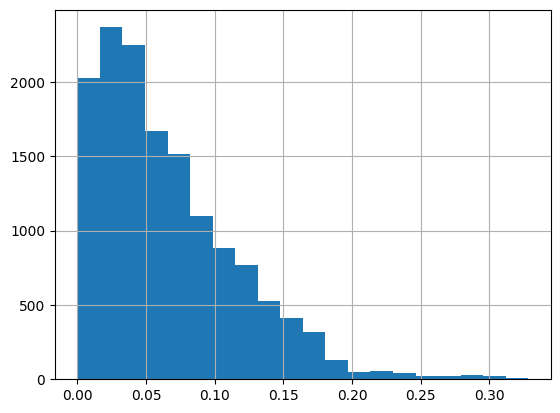

In [39]:
# plot the histogram to reveal the distribution of Item_Visibility columns
data["Item_Visibility"].hist(bins=20) 

In [40]:
# Detecting Outliers
# An outlier is a data point lies outside the overall patterns of the distribution.
# A commonly used rule states that a data point is an outlier if it is more than 1,5*IQR above the third quartile or below the first quartile.
# using this one, we can remove the outliers and output the resulting data in fill_data variable.
# calculate the first quartile for Item_Visibility
Q1 = data["Item_Visibility"].quantile(0.25)
print(Q1)

0.027035682499999998


In [41]:
# calculate the second quartile for Item_Visibility
Q3 = data["Item_Visibility"].quantile(0.75)
print(Q3)

0.0940372535


In [42]:
# calculate the interquartile_range
IQR = Q3-Q1
print(IQR)

0.06700157100000001


In [43]:
fill_data= data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR) ')

In [44]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [45]:
# shape of the dataset without outliers 
fill_data.shape

(13943, 14)

In [46]:
# shape of the original dataset
data.shape

(14204, 14)

In [47]:
# Assign fill_data to dataset to data Dataframe
data = fill_data

In [48]:
data.shape

(13943, 14)

In [49]:
# Modify the Item-Visibility by converting the numerical data into categories Low Visibility, Visibility, High Visbility
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2],labels=['low Vis', 'Visi','High Vis'])

In [50]:
# print the count of the item_visibility_bins
data["Item_Visibility_bins"].value_counts()

Item_Visibility_bins
low Vis     7363
Visi        4283
High Vis    1418
Name: count, dtype: int64

In [51]:
# Replace null values with the low visibility
data["Item_Visibility_bins"]= data["Item_Visibility_bins"].replace(np.nan, "low Viz", regex=True)

In [52]:
# replace all other representation of low fat with low fat
data["Item_Fat_Content"]= data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")
 

In [53]:
# replace all other representation of reg with regular
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace("reg", "Regular")

In [54]:
# print unique fat counts
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [55]:
# initialize the labelencoder
le = LabelEncoder()

In [56]:
# Transform item_fat_contents
data["Item_Fat_Content"]= le.fit_transform(data["Item_Fat_Content"])

In [57]:
# Transform Item_Visibility_bins
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"])

In [58]:
# Transform Outlet_Size
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])

In [59]:
# Transform poutlet_Loction_type
data["Outlet_Location_Type"]= le.fit_transform(data["Outlet_Location_Type"])

In [60]:
# print the unique value of the outlet_type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [61]:
# create dummies for outlet_type
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False


In [62]:
# Explore the count Item_indentifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [63]:
# as there multiples items so count the values of each
data["Item_Identifier"].value_counts()

Item_Identifier
FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: count, Length: 1559, dtype: int64

In [64]:
#As multiple categories are present in item_identifier so reduce this by mapping
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({
    'FD':'Food',
    'NC': 'Non-consumable',
    'DR':'Drinks'
})

In [65]:
# now only three  categories are present in the item_type_combined columns
data["Item_Type_Combined"].value_counts()

Item_Type_Combined
Food              9991
Non-consumable    2652
Drinks            1300
Name: count, dtype: int64

In [66]:
data.shape

(13943, 16)

In [67]:
# Perform one-hot encoding for all columns as the model works as numerical values and not on categorial values.
data = pd.get_dummies(data, columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Type_Combined"]) 

In [68]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                      bool
Item_Fat_Content_1                      bool
Outlet_Location_Type_0                  bool
Outlet_Location_Type_1                  bool
Outlet_Location_Type_2                  bool
Outlet_Size_0                           bool
Outlet_Size_1                           bool
Outlet_Size_2                           bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Typ

In [69]:
import warnings
warnings.filterwarnings('ignore')

# drop the coulmns which have been converted to different types
data.drop(["Item_Type","Outlet_Establishment_Year"], axis=1, inplace=True)

# Divide the dataset created earlier into train and test dataset
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

# Drop unnecessary columns
test.drop(["Item_Outlet_Sales","source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

# Export modified versions of files
train.to_csv("train_modified.csv", index= False)
test.to_csv("test_modified.csv", index=False)


In [70]:
# READ the train or test_modified.csv datasets
train2= pd.read_csv("train_modified.csv")
test2= pd.read_csv("test_modified.csv")

In [71]:
# print the datatypes of train2 columns
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                      bool
Item_Fat_Content_1                      bool
Outlet_Location_Type_0                  bool
Outlet_Location_Type_1                  bool
Outlet_Location_Type_2                  bool
Outlet_Size_0                           bool
Outlet_Size_1                           bool
Outlet_Size_2                           bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Type_Supermarket Type3           bool
Item_Type_Combined_Drinks               bool
Item_Type_Combined_Food                 bool
Item_Type_

In [72]:
X_test = test2.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)


In [73]:

test2.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-consumable
0,FDW58,20.75,0.007565,107.8622,OUT049,19,2,True,False,True,...,False,True,False,False,True,False,False,False,True,False
1,FDW14,8.30,0.038428,87.3198,OUT017,11,2,False,True,False,...,False,True,False,False,True,False,False,False,True,False


In [74]:
train2.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,19,2,True,False,...,False,True,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,9,2,False,True,...,False,True,False,False,False,True,False,True,False,False


In [75]:
# drop the irrelevant varaibles from train2 dataset
# create the independant variable X_train and independant variable y_train
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis=1)
y_train = train2.Item_Outlet_Sales


In [76]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

SyntaxError: invalid syntax (2419952782.py, line 2)